# Spark: sistema de recomendação

## 01. Problema e ferramenta

[Base de dados **Músicas**](https://cdn3.gnarususercontent.com.br/2278-spark-sistema-recomendacao/01/dados_musicas.csv)

[Documentação **PySpark**](https://spark.apache.org/docs/latest/api/python/)

[**Spotify** for Developers (Data Dict)](https://developer.spotify.com/documentation/web-api/reference/#/operations/get-several-audio-features)

### Para saber mais: dicionário dos dados

Dicionário dos dados é um documento muito importante para a pessoa cientista de dados e nele é possível encontrar descrições dos campos, valores e tipos. Nem sempre teremos uma boa documentação dos nossos dados, por exemplo. No nosso caso, conseguimos recorrer à [documentação da API](https://developer.spotify.com/documentation/web-api/reference/#/operations/get-several-audio-features) que forneceu os dados para essa base de dados.

Recomendo a leitura dos conceitos abaixo que foram feitos, em tradução livre, a partir da documentação e conheça melhor os dados. Durante a exploração, volte aqui sempre que tiver dúvida.

**Acousticness/Acústica**: variável numérica; medida de confiança de 0,0 a 1,0 se a faixa é acústica. O 1.0 representa alta confiança de que a faixa é acústica.

**Danceability/Dançabilidade**: variável numérica; a dançabilidade descreve o quão adequada uma faixa é para dançar com base em uma combinação de elementos musicais, incluindo tempo, estabilidade do ritmo, força da batida e regularidade geral. Um valor de 0,0 é o menos e 1,0 é o mais dançável.

**Duration_ms**: variável numérica; a duração da trilha em milissegundos.

**Duration_min**: variável numérica; a duração da faixa em minutos.

**Energy/Energia**: variável numérica; energia é uma medida de 0,0 a 1,0 e representa uma medida perceptiva de intensidade e atividade. Normalmente, as faixas energéticas parecem rápidas, altas e barulhentas. Por exemplo, o death metal tem alta energia, enquanto um prelúdio de Bach tem uma pontuação baixa na escala. As características perceptivas que contribuem para este atributo incluem faixa dinâmica, intensidade percebida, timbre, taxa de início e entropia geral.

**Explicit/Explícito**: variável categórica; se a faixa tem ou não letras explícitas (verdadeiro = sim (1); falso = não(0), não OU desconhecido).

**Id**: o ID do Spotify para a faixa.

**Instrumentalness/Instrumentalidade**: variável numérica; prevê se uma faixa não contém vocais. Os sons “Ooh” e “aah” são tratados como instrumentais neste contexto. Faixas de rap ou de palavras faladas são claramente “vocais”. Quanto mais próximo o valor de instrumentalidade estiver de 1,0, maior a probabilidade de a faixa não conter conteúdo vocal. Valores acima de 0,5 destinam-se a representar faixas instrumentais, mas a confiança é maior à medida que o valor se aproxima de 1,0.

**Key/Chave**: variável numérica; a chave geral estimada da faixa. Os inteiros são mapeados para pitchs usando a notação padrão de Pitch Class. Por exemplo, 0 = C, 1 = C#/Db, 2 = D, e assim por diante. Se nenhuma chave foi detectada, o valor é -1.

**Liveness/Ao vivo**: variável numérica; detecta a presença de um público na gravação. Valores mais altos de vivacidade representam uma probabilidade maior de que a faixa tenha sido executada ao vivo. Um valor acima de 0,8 fornece uma forte probabilidade de que a faixa esteja ativa.

**Loudness/Volume em dB**: variável numérica; volume geral de uma faixa em decibéis (dB). Os valores de volume são calculados em média em toda a faixa e são úteis para comparar o volume relativo das faixas. A sonoridade é a qualidade de um som em relação à sua amplitude (“altura”), por medir a relação entre os picos e depressões de uma onda sonora. Os valores típicos variam entre -60 e 0 db.

**Mode/Modo**: variável numérica; o modo indica a modalidade (maior ou menor) de uma faixa, o tipo de escala da qual seu conteúdo melódico é derivado. Maior é representado por 1 e menor é 0.

**Popularity/Popularidade**: variável numérica; a popularidade de uma faixa é um valor entre 0 e 100, sendo 100 o mais popular. A popularidade é calculada por algoritmo e é baseada, em grande parte, no número total de execuções que a faixa teve e quão recentes são essas execuções.

**Speechiness/Fala**: variável numérica; detecta a presença de palavras faladas em uma faixa. Quanto mais exclusivamente falada a gravação (por exemplo, talk show, audiolivro, poesia), mais próximo de 1,0 será o valor do atributo. Valores acima de 0,66 descrevem faixas que provavelmente são feitas inteiramente de palavras faladas. Valores entre 0,33 e 0,66 descrevem faixas que podem conter música e fala, seja em seções ou em camadas, incluindo casos como música estilo rap. Os valores abaixo de 0,33 provavelmente representam músicas e outras faixas que não são de fala.

**Tempo**: variável numérica; tempo estimado geral de uma faixa em batidas por minuto (BPM). Na terminologia musical, tempo é a velocidade ou ritmo de uma determinada peça e deriva diretamente da duração média da batida.

**Valence/Valência**: variável numérica; medida de 0,0 a 1,0 descrevendo a positividade musical transmitida por uma faixa. Faixas com alta valência soam mais positivas (por exemplo, feliz, alegre, eufórica), enquanto faixas com baixa valência soam mais negativas (como, triste, deprimida, irritada).

**Year/Ano**: ano em que a música foi lançada.

### Configurando o PySpark

In [1]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .master("local[*]") \
    .appName("Recomendador PySpark") \
    .getOrCreate()
spark

25/09/08 14:30:42 WARN Utils: Your hostname, DSN-1003 resolves to a loopback address: 127.0.1.1; using 172.29.1.248 instead (on interface enp3s0)
25/09/08 14:30:42 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/09/08 14:30:43 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


## 02. Leitura e análise dos dados

### Leitura dos dados

In [2]:
from pyspark import SparkFiles

In [3]:
url_dados = "https://github.com/IgorNascAlves/dados/blob/main/dados_musicas.csv?raw=True"
spark.sparkContext.addFile(url_dados)
path_dados_file = "file://" + SparkFiles.get("dados_musicas.csv")

In [4]:
dados = spark.read.csv(path_dados_file, header=True, sep=";", inferSchema=True)

In [5]:
dados.show()

+------------------+----+------------+--------------+------------------+-----------+------------------+--------+--------------------+--------------------+---+--------+-------------------+----+--------------------+----------+-----------+------------------+--------------------+
|           valence|year|acousticness|       artists|      danceability|duration_ms|            energy|explicit|                  id|    instrumentalness|key|liveness|           loudness|mode|                name|popularity|speechiness|             tempo|        artists_song|
+------------------+----+------------+--------------+------------------+-----------+------------------+--------+--------------------+--------------------+---+--------+-------------------+----+--------------------+----------+-----------+------------------+--------------------+
|             0.285|2000|     0.00239|      Coldplay|             0.429|     266773|0.6609999999999999|       0|3AJwUDP919kvQ9Qco...|             1.21E-4| 11|   0.234|  

In [6]:
dados.printSchema()

root
 |-- valence: double (nullable = true)
 |-- year: integer (nullable = true)
 |-- acousticness: double (nullable = true)
 |-- artists: string (nullable = true)
 |-- danceability: double (nullable = true)
 |-- duration_ms: integer (nullable = true)
 |-- energy: double (nullable = true)
 |-- explicit: integer (nullable = true)
 |-- id: string (nullable = true)
 |-- instrumentalness: double (nullable = true)
 |-- key: integer (nullable = true)
 |-- liveness: double (nullable = true)
 |-- loudness: double (nullable = true)
 |-- mode: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- popularity: integer (nullable = true)
 |-- speechiness: double (nullable = true)
 |-- tempo: double (nullable = true)
 |-- artists_song: string (nullable = true)



In [7]:
dados.count()

20311

In [8]:
len(dados.columns)

19

In [9]:
import pyspark.sql.functions as f

In [10]:
dados.select([f.count(f.when(f.isnull(col), 1)).alias(col) for col in dados.columns]).show()

+-------+----+------------+-------+------------+-----------+------+--------+---+----------------+---+--------+--------+----+----+----------+-----------+-----+------------+
|valence|year|acousticness|artists|danceability|duration_ms|energy|explicit| id|instrumentalness|key|liveness|loudness|mode|name|popularity|speechiness|tempo|artists_song|
+-------+----+------------+-------+------------+-----------+------+--------+---+----------------+---+--------+--------+----+----+----------+-----------+-----+------------+
|      0|   0|           0|      0|           0|          0|     0|       0|  0|               0|  0|       0|       0|   0|   0|         0|          0|    0|           0|
+-------+----+------------+-------+------------+-----------+------+--------+---+----------------+---+--------+--------+----+----+----------+-----------+-----+------------+



In [11]:
print(sorted(dados.select("year").distinct().collect()))

[Row(year=2000), Row(year=2001), Row(year=2002), Row(year=2003), Row(year=2004), Row(year=2005), Row(year=2006), Row(year=2007), Row(year=2008), Row(year=2009), Row(year=2010), Row(year=2011), Row(year=2012), Row(year=2013), Row(year=2014), Row(year=2015), Row(year=2016), Row(year=2017), Row(year=2018), Row(year=2019), Row(year=2020)]


### Análise dos dados

In [12]:
url_anos_dados = "https://github.com/IgorNascAlves/dados/blob/main/dados_musicas_ano.csv?raw=True"
spark.sparkContext.addFile(url_anos_dados)
path_dados_anos_file = "file://" + SparkFiles.get("dados_musicas_ano.csv")
dados_anos = spark.read.csv(path_dados_anos_file, header=True, inferSchema=True)

In [13]:
dados_anos.show()

+----+----+------------------+-------------------+------------------+-------------------+-------------------+-------------------+-------------------+-------------------+------------------+-------------------+-------------------+---+
|mode|year|      acousticness|       danceability|       duration_ms|             energy|   instrumentalness|           liveness|           loudness|        speechiness|             tempo|            valence|         popularity|key|
+----+----+------------------+-------------------+------------------+-------------------+-------------------+-------------------+-------------------+-------------------+------------------+-------------------+-------------------+---+
|   1|1921|0.8868960000000005| 0.4185973333333336|260537.16666666663|0.23181513333333334|0.34487805886666656|            0.20571| -17.04866666666665|           0.073662|101.53149333333329|0.37932666666666665| 0.6533333333333333|  2|
|   1|1922|0.9385915492957748| 0.4820422535211267|165469.74647887325

In [14]:
dados_anos = dados_anos.where("year >= 2000")
dados_anos.show()

+----+----+-------------------+------------------+------------------+------------------+-------------------+-------------------+-------------------+-------------------+------------------+------------------+------------------+---+
|mode|year|       acousticness|      danceability|       duration_ms|            energy|   instrumentalness|           liveness|           loudness|        speechiness|             tempo|           valence|        popularity|key|
+----+----+-------------------+------------------+------------------+------------------+-------------------+-------------------+-------------------+-------------------+------------------+------------------+------------------+---+
|   1|2000|0.28932270051635994| 0.590918047034764| 242724.6426380368|0.6254128323108387|0.10116776879345596| 0.1976860429447853| -8.247765848670758|0.08920541922290394| 118.9993231083843|0.5594754601226991|  46.6840490797546|  7|
|   1|2001| 0.2868424748428934|0.5833178553615969|240307.79600997505|0.626985522

In [15]:
dados_anos.count()

21

In [16]:
len(dados_anos.columns)

14

In [17]:
import plotly.express as px
import plotly.io as pio

pio.renderers.default = "iframe"
fig = px.line(dados_anos.toPandas(), x="year", y="loudness", markers=True, title="Variação do loudness conforme os anos")
fig.show()

In [18]:
import plotly.graph_objects as go

fig = go.Figure()

temp = dados_anos.toPandas()

fig.add_trace(
    go.Scatter(
        x=temp["year"],
        y=temp["acousticness"],
        name="Acousticness"
    )
)
fig.add_trace(
    go.Scatter(
        x=temp["year"],
        y=temp["valence"],
        name="Valence"
    )
)
fig.add_trace(
    go.Scatter(
        x=temp["year"],
        y=temp["danceability"],
        name="Danceability"
    )
)
fig.add_trace(
    go.Scatter(
        x=temp["year"],
        y=temp["energy"],
        name="Energy"
    )
)
fig.add_trace(
    go.Scatter(
        x=temp["year"],
        y=temp["instrumentalness"],
        name="Instrumentalness"
    )
)
fig.add_trace(
    go.Scatter(
        x=temp["year"],
        y=temp["liveness"],
        name="Liveness"
    )
)
fig.add_trace(
    go.Scatter(
        x=temp["year"],
        y=temp["speechiness"],
        name="Speechiness"
    )
)

fig.show()

### Para saber mais: ferramenta Plotly

A biblioteca [Plotly](https://plotly.com/python/), semelhante às bibliotecas [Matplotlib](https://matplotlib.org/) e [Seaborn](https://seaborn.pydata.org/) tem como seu propósito a criação de gráficos. Assim como a biblioteca Seaborn, que cria gráficos incríveis sem ser necessário muitas configurações, a Plotly vem com a proposta de trazer gráficos prontos para a apresentação e com o diferencial deles serem interativos, o que é muito útil em exploração e em apresentações.

Para a criação de gráfico podemos utilizar dois principais módulos:

- [Plotly Express](https://plotly.com/python/plotly-express/) permite criar a figura do gráfico toda de uma vez e é a melhor opção para fazer gráficos mais comuns, porque vamos conseguir utilizar apenas uma linha de código e um gráfico muito bem formado.
```python
import plotly.express as px
```

- [Graph Objects](https://plotly.com/python/graph-objects/) é uma representação mais complexa de uma figura, permitindo criar gráficos diferenciados com animações, por exemplo. Esse módulo é mais complexo de utilizar, já que precisamos de diversos métodos para cada elemento que vamos gerar no gráfico.
```python
import plotly.graph_objects as go
```

Ambos os módulos são muito úteis e devem ser usados em situações específicas. Assim, leia mais a documentação deles e seus exemplos para poder tornar a exploração dos dados musicais mais rica.

### Matriz de correlação

In [19]:
fig = px.imshow(dados_anos.drop("mode").toPandas().corr(), text_auto=True)
fig.show()

## 03. Clusterização por gênero musical

### StandardScaler

In [20]:
url_dados_generos = "https://github.com/IgorNascAlves/dados/blob/main/dados_musicas_genero.csv?raw=True"
spark.sparkContext.addFile(url_dados_generos)
path_dados_genero_file = "file://" + SparkFiles.get("dados_musicas_genero.csv")
dados_generos = spark.read.csv(path_dados_genero_file, header=True, inferSchema=True)

In [21]:
dados_generos.show()

+----+--------------------+-------------------+-------------------+------------------+-------------------+--------------------+-------------------+-------------------+--------------------+------------------+-------------------+------------------+---+
|mode|              genres|       acousticness|       danceability|       duration_ms|             energy|    instrumentalness|           liveness|           loudness|         speechiness|             tempo|            valence|        popularity|key|
+----+--------------------+-------------------+-------------------+------------------+-------------------+--------------------+-------------------+-------------------+--------------------+------------------+-------------------+------------------+---+
|   1|21st century clas...| 0.9793333333333332|0.16288333333333335|160297.66666666663|0.07131666666666665|          0.60683367|             0.3616|-31.514333333333337| 0.04056666666666667|           75.3365|0.10378333333333334| 27.83333333333333| 

In [22]:
dados_generos.count()

2973

In [23]:
dados_generos.select("genres").distinct().count()

2973

In [24]:
len(dados_generos.columns)

14

In [25]:
from pyspark.ml.feature import VectorAssembler

In [26]:
X = dados_generos.columns
X.remove("genres")
X

['mode',
 'acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'instrumentalness',
 'liveness',
 'loudness',
 'speechiness',
 'tempo',
 'valence',
 'popularity',
 'key']

In [27]:
dados_generos_vector = VectorAssembler(inputCols=X, outputCol="features").transform(dados_generos).select("features", "genres")

In [28]:
dados_generos_vector.show(5, truncate=False)

+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------------------+
|features                                                                                                                                                                                                                   |genres                |
+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------------------+
|[1.0,0.9793333333333332,0.16288333333333335,160297.66666666663,0.07131666666666665,0.60683367,0.3616,-31.514333333333337,0.04056666666666667,75.3365,0.10378333333333334,27.83333333333333,6.0]                            |21st century classical|
|[1.0,0.49478,0.2993

25/09/08 14:30:53 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


In [29]:
from pyspark.ml.feature import StandardScaler

In [30]:
scaler = StandardScaler(inputCol="features", outputCol="scaled_features")
scaler_model = scaler.fit(dados_generos_vector)
dados_generos_scaled = scaler_model.transform(dados_generos_vector)

In [31]:
dados_generos_scaled.show(5)

+--------------------+--------------------+--------------------+
|            features|              genres|     scaled_features|
+--------------------+--------------------+--------------------+
|[1.0,0.9793333333...|21st century clas...|[2.68174831000279...|
|[1.0,0.49478,0.29...|               432hz|[2.68174831000279...|
|[1.0,0.762,0.7120...|               8-bit|[2.68174831000279...|
|[1.0,0.6514170195...|                  []|[2.68174831000279...|
|[1.0,0.6765573049...|          a cappella|[2.68174831000279...|
+--------------------+--------------------+--------------------+
only showing top 5 rows



### Para saber mais: o que é o StandarScaler?

O [StandardScaler](https://spark.apache.org/docs/latest/ml-features.html#standardscaler) é reponsável por padronizar nossos dados. Mas o que é a padronização?

A **padronização** dimensiona cada variável de entrada separadamente subtraindo a média (chamada de centralização) e dividindo pelo desvio padrão para deslocar a distribuição a fim de ter uma média de 0 e um desvio padrão de 1. Esse processo pode ser pensado como subtrair o valor médio ou centralizar os dados e é necessário conhecer os valores de média e desvio padrão dos dados. Um valor é padronizado da seguinte forma:

$$\huge y = \frac{x - \mu}{\sigma} $$

Onde a média ($\mu$) é calculada como:

$$\huge \mu = \frac{\sum{x_{i}}}{n} $$

E o desvio padrão ($\sigma$) pode ser calculado como:

$$\huge \sigma = \sqrt{\frac{\sum{(x_{i} - \mu)^2}}{n}} $$

### PCA - Principal Component Analysis

In [32]:
from pyspark.ml.feature import PCA

In [33]:
pca = PCA(k=2, inputCol="scaled_features", outputCol="pca_features")
pca_model = pca.fit(dados_generos_scaled)
dados_generos_pca = pca_model.transform(dados_generos_scaled)

25/09/08 14:30:54 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.VectorBLAS
                                                                                

In [34]:
dados_generos_pca.select("pca_features").show(truncate=False)

+-----------------------------------------+
|pca_features                             |
+-----------------------------------------+
|[-2.507095366888566,-0.43816913737698426]|
|[0.5969679056633481,-4.9816120527513545] |
|[4.158460276223561,0.8366525081079923]   |
|[2.3873448785122164,0.4877989015663364]  |
|[2.6501218371679087,0.5756819768820428]  |
|[1.4965091203367626,-1.8644183183717817] |
|[3.9235207721573238,-0.2851835002352867] |
|[4.6110111098311135,0.6783790472312343]  |
|[2.8376900630842297,0.5712993716580531]  |
|[2.7066901398927827,1.2593788079708268]  |
|[4.698331383924287,-1.2765569680619442]  |
|[3.3759874966798673,-0.7560741064307506] |
|[5.608998877066021,-1.042731164439324]   |
|[-0.2954946352117681,0.27638645862362693]|
|[2.5725591062870423,1.3169815431109755]  |
|[3.400822802049345,-0.5073029625781933]  |
|[4.366720316263418,0.3364827059771049]   |
|[2.7254698167724003,-0.5058604987046399] |
|[4.958112358381604,-1.2627579957290722]  |
|[3.6934951846422712,-1.38227620

In [35]:
from pyspark.ml import Pipeline

In [36]:
pca_pipeline = Pipeline(stages=[VectorAssembler(inputCols=X, outputCol="features"),
                                StandardScaler(inputCol="features", outputCol="scaled_features"),
                                PCA(k=2, inputCol="scaled_features", outputCol="pca_features")])

In [37]:
pca_pipeline_model = pca_pipeline.fit(dados_generos)

In [38]:
dados_generos_pca = pca_pipeline_model.transform(dados_generos)

In [39]:
dados_generos_pca.show()

+----+--------------------+-------------------+-------------------+------------------+-------------------+--------------------+-------------------+-------------------+--------------------+------------------+-------------------+------------------+---+--------------------+--------------------+--------------------+
|mode|              genres|       acousticness|       danceability|       duration_ms|             energy|    instrumentalness|           liveness|           loudness|         speechiness|             tempo|            valence|        popularity|key|            features|     scaled_features|        pca_features|
+----+--------------------+-------------------+-------------------+------------------+-------------------+--------------------+-------------------+-------------------+--------------------+------------------+-------------------+------------------+---+--------------------+--------------------+--------------------+
|   1|21st century clas...| 0.9793333333333332|0.162883333

In [40]:
dados_generos_pca.select("pca_features").show(truncate=False)

+-----------------------------------------+
|pca_features                             |
+-----------------------------------------+
|[-2.507095366888566,-0.43816913737698426]|
|[0.5969679056633481,-4.9816120527513545] |
|[4.158460276223561,0.8366525081079923]   |
|[2.3873448785122164,0.4877989015663364]  |
|[2.6501218371679087,0.5756819768820428]  |
|[1.4965091203367626,-1.8644183183717817] |
|[3.9235207721573238,-0.2851835002352867] |
|[4.6110111098311135,0.6783790472312343]  |
|[2.8376900630842297,0.5712993716580531]  |
|[2.7066901398927827,1.2593788079708268]  |
|[4.698331383924287,-1.2765569680619442]  |
|[3.3759874966798673,-0.7560741064307506] |
|[5.608998877066021,-1.042731164439324]   |
|[-0.2954946352117681,0.27638645862362693]|
|[2.5725591062870423,1.3169815431109755]  |
|[3.400822802049345,-0.5073029625781933]  |
|[4.366720316263418,0.3364827059771049]   |
|[2.7254698167724003,-0.5058604987046399] |
|[4.958112358381604,-1.2627579957290722]  |
|[3.6934951846422712,-1.38227620

### Para saber mais: o que é o PCA?

[PCA](https://spark.apache.org/docs/latest/ml-features.html#pca) é um método clássico que podemos usar para reduzir dados de alta dimensionalidade para um espaço de baixa dimensão. Em outras palavras, não podemos visualizar com precisão conjuntos de dados de alta dimensão porque não é possível observar nada acima de 3 dimensões (3D). Um dos principais objetivos do PCA é transformar conjuntos de dados com mais de 3 dimensões (alta dimensão) em gráficos tipicamente 2D ou 3D para nós e isso é o que chamamos de espaço de baixa dimensão.

Mesmo fazendo toda a redução de *n* dimensões existentes para 2D, no nosso caso, ainda conseguimos reter uma parte da variação de informação do conjunto de dados de alta dimensão. Então, as variações dos dados que eram contidas em *n* dimensões passam a estar em 2 componentes principais (PC). O primeiro PC contém a maioria das informações de variação dos recursos originais, o segundo conterá a próxima maior quantidade de informações, e caso tivéssemos mais PCs, seria essa mesma sequência com os PCs não correlacionados entre si, o que significa que cada um guarda informações únicas.

Se quiser entender mais sobre as PCAs, temos um ótimo curso na plataforma [Análise de componentes principais: elaboração de rankings com o PCA](https://cursos.alura.com.br/course/analise-componentes-elaboracao-rankings-pca).

### [K-Means](https://user.ceng.metu.edu.tr/~akifakkus/courses/ceng574/k-means/)

In [41]:
from pyspark.ml.clustering import KMeans

In [42]:
SEED = 1234

In [43]:
kmeans = KMeans(featuresCol="pca_features", predictionCol="cluster_pca").setK(5).setSeed(SEED)

In [44]:
kmeans_model = kmeans.fit(dados_generos_pca)

In [45]:
predictions_kmeans = kmeans_model.transform(dados_generos_pca)

In [46]:
predictions_kmeans.select("pca_features", "cluster_pca").show(truncate=False)

+-----------------------------------------+-----------+
|pca_features                             |cluster_pca|
+-----------------------------------------+-----------+
|[-2.507095366888566,-0.43816913737698426]|3          |
|[0.5969679056633481,-4.9816120527513545] |3          |
|[4.158460276223561,0.8366525081079923]   |4          |
|[2.3873448785122164,0.4877989015663364]  |2          |
|[2.6501218371679087,0.5756819768820428]  |2          |
|[1.4965091203367626,-1.8644183183717817] |3          |
|[3.9235207721573238,-0.2851835002352867] |0          |
|[4.6110111098311135,0.6783790472312343]  |4          |
|[2.8376900630842297,0.5712993716580531]  |2          |
|[2.7066901398927827,1.2593788079708268]  |2          |
|[4.698331383924287,-1.2765569680619442]  |1          |
|[3.3759874966798673,-0.7560741064307506] |0          |
|[5.608998877066021,-1.042731164439324]   |4          |
|[-0.2954946352117681,0.27638645862362693]|3          |
|[2.5725591062870423,1.3169815431109755]  |2    

### Para saber mais: o que é o K-means?

Quando lidamos com um problema de agrupamento, queremos usar um algoritmo que descubra grupos significativos nos dados, como no nosso caso, para agrupar gêneros musicais e músicas. Seja para qualquer fim, o algoritmo faz essa descoberta sem interveções externas, já que não precisa de rótulos para prever os grupos.

Sabendo disso, o K-means tenta organizar os dados em um número *k* de clusters que definimos inicialmente. A partir disso, ele identifica os pontos de dados semelhantes e vai criando agrupamentos, tentando distanciar cada cluster o máximo possível. O cálculo das semelhanças é feito utilizando a distância euclidiana ou uma linha reta comum entre dois pontos. Quanto menor a distância euclidiana, mais próximos os dois pontos estão e mais semelhantes eles são por consequência.

O processo de como o K-means funciona é relativamente simples e repetitivo.

1. O usuário define o valor de clusters (*k*).
2. O K-means selecionará um ponto aleatório para cada centróide. Temos *k*-centróides nesse ponto e um centróide é o ponto em torno do qual cada cluster é construído.
3. A distância euclidiana é calculada entre cada ponto de cada centróide. A partir disso, cada ponto será atribuído a um centróide (mais próximo com base na distância euclidiana).
4. O algoritmo, então, calcula a média da distância euclidiana, entre cada ponto do cluster e o centróide, para definir um novo centróide.
5. O processo 4 se repete até que os centróides dos clusters não se movam mais.

Existe um site chamado [K-Means Clustering Demo](https://user.ceng.metu.edu.tr/~akifakkus/courses/ceng574/k-means/), no qual podemos ver uma animação de como esse processo acontece.

### Plotando o cluster

In [47]:
from pyspark.ml.functions import vector_to_array

In [48]:
pca_features_xy = predictions_kmeans.withColumn("x", vector_to_array("pca_features")[0]) \
                  .withColumn("y", vector_to_array("pca_features")[1]) \
                  .select("x", "y", "cluster_pca", "genres")

In [49]:
pca_features_xy.show()

+-------------------+--------------------+-----------+--------------------+
|                  x|                   y|cluster_pca|              genres|
+-------------------+--------------------+-----------+--------------------+
| -2.507095366888566|-0.43816913737698426|          3|21st century clas...|
| 0.5969679056633481| -4.9816120527513545|          3|               432hz|
|  4.158460276223561|  0.8366525081079923|          4|               8-bit|
| 2.3873448785122164|  0.4877989015663364|          2|                  []|
| 2.6501218371679087|  0.5756819768820428|          2|          a cappella|
| 1.4965091203367626| -1.8644183183717817|          3|            abstract|
| 3.9235207721573238| -0.2851835002352867|          0|      abstract beats|
| 4.6110111098311135|  0.6783790472312343|          4|    abstract hip hop|
| 2.8376900630842297|  0.5712993716580531|          2|           accordeon|
| 2.7066901398927827|  1.2593788079708268|          2|           accordion|
|  4.6983313

In [50]:
fig = px.scatter(pca_features_xy.toPandas(), x="x", y="y", color="cluster_pca", hover_data=["x", "y", "genres"])
fig.show()

In [51]:
pca_pipeline_model.stages[2].explainedVariance

DenseVector([0.2975, 0.1212])

In [52]:
# Na definição da função vamos incluir os parâmetros que gostariamos de variar, como quantidade componentes, número de clusters e colunas utilizadas
def cria_pipeline(k_PCA=2, SEED=1224, k_kmeans=5, columns=X, data=dados_generos):
    # Definição do Pipeline
    # Primeiro a vetorização das colunas selecionadas
    # Segundo a padronização dos dados com o StandardScaler
    # Terceiro o PCA com o número k_PCA de componentes
    # Quarto o KMeans com o número k_kmeans de clusters
    pca_pipeline = Pipeline(stages=[VectorAssembler(inputCols = columns, outputCol = "features"),
                                    StandardScaler(inputCol="features", outputCol="scaled_features"),
                                    PCA(k=k_PCA, inputCol="scaled_features", outputCol="pca_features"),
                                    KMeans(featuresCol="pca_features", predictionCol="cluster_pca", seed=SEED, k=k_kmeans)])

    # ajuste da pipeline com os dados
    model = pca_pipeline.fit(data)

    # transformação dos dados utilizando o modelo da pipeline
    predictions_kmeans = model.transform(data)

    # criando duas novas colunas a partir das primeiras duas componentes do PCA
    pca_features_xs = predictions_kmeans.withColumn("x", vector_to_array("pca_features")[0])\
                                        .withColumn("y", vector_to_array("pca_features")[1])\
                                        .select(["x", "y", "cluster_pca", "genres"])

    # plotando as duas componentes e o cluster
    fig = px.scatter(
    pca_features_xs.toPandas(), x="x", y="y", color="cluster_pca", hover_data=["x", "y", "genres"])
    fig.show()

    # retornando pipeline ajustado
    return model

## 04. Clusterização por música

### Redução de dimensionalidade

In [53]:
dados.show()

+------------------+----+------------+--------------+------------------+-----------+------------------+--------+--------------------+--------------------+---+--------+-------------------+----+--------------------+----------+-----------+------------------+--------------------+
|           valence|year|acousticness|       artists|      danceability|duration_ms|            energy|explicit|                  id|    instrumentalness|key|liveness|           loudness|mode|                name|popularity|speechiness|             tempo|        artists_song|
+------------------+----+------------+--------------+------------------+-----------+------------------+--------+--------------------+--------------------+---+--------+-------------------+----+--------------------+----------+-----------+------------------+--------------------+
|             0.285|2000|     0.00239|      Coldplay|             0.429|     266773|0.6609999999999999|       0|3AJwUDP919kvQ9Qco...|             1.21E-4| 11|   0.234|  

In [54]:
X = dados.columns
X.remove("artists")
X.remove("id")
X.remove("name")
X.remove("artists_song")
X

['valence',
 'year',
 'acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'explicit',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'mode',
 'popularity',
 'speechiness',
 'tempo']

In [55]:
dados_encoded_vector = VectorAssembler(inputCols=X, outputCol="features").transform(dados)

In [56]:
dados_encoded_vector.select("features").show(truncate=False)

+-------------------------------------------------------------------------------------------------------------------------+
|features                                                                                                                 |
+-------------------------------------------------------------------------------------------------------------------------+
|[0.285,2000.0,0.00239,0.429,266773.0,0.6609999999999999,0.0,1.21E-4,11.0,0.234,-7.227,1.0,84.0,0.0281,173.372]           |
|[0.613,2000.0,0.143,0.843,270507.0,0.8059999999999999,1.0,0.0,4.0,0.0771,-5.9460000000000015,0.0,80.0,0.269,94.948]      |
|[0.4,2000.0,0.00958,0.556,216880.0,0.8640000000000001,0.0,0.0,3.0,0.209,-5.87,0.0,84.0,0.0584,105.143]                   |
|[0.5429999999999999,2000.0,0.00664,0.545,233933.0,0.865,0.0,1.1E-5,11.0,0.168,-5.7079999999999975,0.0,78.0,0.0286,99.009]|
|[0.76,2000.0,0.0302,0.949,284200.0,0.6609999999999999,1.0,0.0,5.0,0.0454,-4.244,0.0,80.0,0.0572,104.504]                 |
|[0.941,

In [57]:
scaler = StandardScaler(inputCol="features", outputCol="features_scaled")
scaler_model = scaler.fit(dados_encoded_vector)
dados_musicas_scaled = scaler_model.transform(dados_encoded_vector)

In [58]:
dados_musicas_scaled.select("features_scaled").show(truncate=False)

+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|features_scaled                                                                                                                                                                                                                                                                              |
+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|[1.156596679221045,329.8170613984441,0.008403188822334736,2.5040545743834373,3.7858811737298526,2.980511298201045,0.0,6.070790766862789

25/09/08 14:30:57 WARN GarbageCollectionMetrics: To enable non-built-in garbage collector(s) List(G1 Concurrent GC), users should configure it(them) to spark.eventLog.gcMetrics.youngGenerationGarbageCollectors or spark.eventLog.gcMetrics.oldGenerationGarbageCollectors


In [59]:
k = len(X)
k

15

In [60]:
pca = PCA(k=k, inputCol="features_scaled", outputCol="pca_features")
pca_model = pca.fit(dados_musicas_scaled)
dados_musicais_pca = pca_model.transform(dados_musicas_scaled)

In [61]:
sum(pca_model.explainedVariance) * 100

np.float64(100.00000000000004)

In [62]:
lista_valores = [sum(pca_model.explainedVariance[0:i + 1]) for i in range(k)]
lista_valores

[np.float64(0.21297354127107346),
 np.float64(0.3459774162295507),
 np.float64(0.43989805678254457),
 np.float64(0.5267820578269105),
 np.float64(0.6001038103117929),
 np.float64(0.666571951365239),
 np.float64(0.7282174213581728),
 np.float64(0.7845103843321024),
 np.float64(0.8350002357002615),
 np.float64(0.8812446547406771),
 np.float64(0.9151737562703051),
 np.float64(0.9435370133056041),
 np.float64(0.9699018569070164),
 np.float64(0.9900947792885583),
 np.float64(1.0000000000000004)]

In [63]:
import numpy as np

In [64]:
k = sum(np.array(lista_valores) <= 0.7)
k

np.int64(6)

In [65]:
pca = PCA(k=k, inputCol="features_scaled", outputCol="pca_features")
pca_model = pca.fit(dados_musicas_scaled)
dados_musicas_pca_final = pca_model.transform(dados_musicas_scaled)

In [66]:
dados_musicas_pca_final.select("pca_features").show(5, False)

+-----------------------------------------------------------------------------------------------------------------------+
|pca_features                                                                                                           |
+-----------------------------------------------------------------------------------------------------------------------+
|[-34.71004464775706,-165.3684878490618,-11.163498729832531,-139.11374280854452,14.152192300931285,-6.254422223810332]  |
|[-36.49885762774909,-167.85185045616552,-10.729023248906778,-135.90435265671317,13.388401890587135,-3.9729807278308047]|
|[-35.46030091694059,-165.99633344577884,-11.361290348240804,-138.2427688124702,13.866654919305686,-4.342675920458655]  |
|[-35.56301325520586,-165.59515096480604,-11.460226007030595,-137.52095740570059,15.568542803922625,-4.542073725584207] |
|[-36.5455697490757,-167.3751250580248,-11.881276527235773,-136.27798590244,14.056847990344442,-3.5833901457791004]     |
+-----------------------

In [67]:
sum(pca_model.explainedVariance) * 100

np.float64(66.6571951365239)

### Criação dos clusters

In [68]:
pca_pipeline = Pipeline(stages=[VectorAssembler(inputCols=X, outputCol="features"),
                                StandardScaler(inputCol="features", outputCol="features_scaled"),
                                PCA(k=6, inputCol="features_scaled", outputCol="pca_features")])

In [69]:
pca_pipeline_model = pca_pipeline.fit(dados)

In [70]:
projection = pca_pipeline_model.transform(dados)

In [71]:
projection.select("pca_features").show(5, truncate=False)

+-----------------------------------------------------------------------------------------------------------------------+
|pca_features                                                                                                           |
+-----------------------------------------------------------------------------------------------------------------------+
|[-34.71004464775706,-165.3684878490618,-11.163498729832531,-139.11374280854452,14.152192300931285,-6.254422223810332]  |
|[-36.49885762774909,-167.85185045616552,-10.729023248906778,-135.90435265671317,13.388401890587135,-3.9729807278308047]|
|[-35.46030091694059,-165.99633344577884,-11.361290348240804,-138.2427688124702,13.866654919305686,-4.342675920458655]  |
|[-35.56301325520586,-165.59515096480604,-11.460226007030595,-137.52095740570059,15.568542803922625,-4.542073725584207] |
|[-36.5455697490757,-167.3751250580248,-11.881276527235773,-136.27798590244,14.056847990344442,-3.5833901457791004]     |
+-----------------------

In [72]:
kmeans = KMeans(k=50, featuresCol="pca_features", predictionCol="cluster_pca", seed=SEED)

In [73]:
kmeans_model = kmeans.fit(projection)

In [74]:
projection_kmeans = kmeans_model.transform(projection)

In [75]:
projection_kmeans.select("pca_features", "cluster_pca").show(truncate=False)

+-----------------------------------------------------------------------------------------------------------------------+-----------+
|pca_features                                                                                                           |cluster_pca|
+-----------------------------------------------------------------------------------------------------------------------+-----------+
|[-34.71004464775706,-165.3684878490618,-11.163498729832531,-139.11374280854452,14.152192300931285,-6.254422223810332]  |23         |
|[-36.49885762774909,-167.85185045616552,-10.729023248906778,-135.90435265671317,13.388401890587135,-3.9729807278308047]|45         |
|[-35.46030091694059,-165.99633344577884,-11.361290348240804,-138.2427688124702,13.866654919305686,-4.342675920458655]  |3          |
|[-35.56301325520586,-165.59515096480604,-11.460226007030595,-137.52095740570059,15.568542803922625,-4.542073725584207] |16         |
|[-36.5455697490757,-167.3751250580248,-11.881276527235773,-13

In [76]:
projection_kmeans = projection_kmeans.withColumn("x", vector_to_array("pca_features")[0]) \
                                     .withColumn("y", vector_to_array("pca_features")[1])

In [77]:
projection_kmeans.select("x", "y", "cluster_pca", "artists_song").show(truncate=False)

+-------------------+-------------------+-----------+--------------------------------------------------------+
|x                  |y                  |cluster_pca|artists_song                                            |
+-------------------+-------------------+-----------+--------------------------------------------------------+
|-34.71004464775706 |-165.3684878490618 |23         |Coldplay - Yellow                                       |
|-36.49885762774909 |-167.85185045616552|45         |OutKast - Ms. Jackson                                   |
|-35.46030091694059 |-165.99633344577884|3          |Linkin Park - In the End                                |
|-35.56301325520586 |-165.59515096480604|16         |3 Doors Down - Kryptonite                               |
|-36.5455697490757  |-167.3751250580248 |45         |Eminem - The Real Slim Shady                            |
|-36.71322229026236 |-166.48208483099705|45         |Disturbed - Down with the Sickness                      |
|

### Para saber mais: Pipeline

O objetivo do [Pipeline](https://spark.apache.org/docs/latest/ml-pipeline.html) é tornar o processo de transformação dos dados, que precisa ser executado na ordem correta, mais automático e de mais fácil entendimento. Mas antes, precisamos compreender dois conceitos:

- **Estimador**: é qualquer objeto que tem a capacidade de prever alguns parâmetros com base em um conjunto de dados. O estimador realiza essa previsão se ajustando aos dados por meio do método `.fit()`. Logo, todo estimador deve possuir esse método. Nesse [link](https://spark.apache.org/docs/latest/ml-pipeline.html#estimators) você pode consultar os estimadores.

- **Transformador**: são estimadores que realizam transformação em um conjunto de dados. Nos transformadores, o método `.fit()` aprende os parâmetros como média e desvio padrão, que serão usados na normalização pelo método `.transform()`, fazendo a transformação nos dados. Nesse [link](https://spark.apache.org/docs/latest/ml-pipeline.html#transformers) você encontra os transformadores.

Quando consultamos a documentação do Pipeline nos é passado que os passos devem ser uma lista com os objetos de transformadores e estimadores. Resumidamente, no pipeline estão todos os passos da transformação que você quer realizar nos dados sendo, por último, o uso de um estimador para se adaptar aos dados e possibilitar a realização de previsões.

```python
pca_pipeline = Pipeline(stages=[VectorAssembler(inputCols=X, outputCol='features'),
                                StandardScaler(inputCol='features', outputCol='features_scaled'),
                                PCA(k=6, inputCol='features_scaled', outputCol='pca_features'),
                                KMeans(k=50, featuresCol='pca_features', predictionCol='cluster_pca', seed=SEED)])
```

No pipeline foi adotado a seguinte sequência de passos: primeiro, realizar o VectorAssembler; depois, o StandarScaler no conjunto de dados (lembrando que para ter mais de uma transformação, bastaria colocar em sequência e então a saída da primeira transformação seria a entrada da segunda transformação a ser realizada); e a última transformação será com o PCA. Em seguida, esses dados transformados serão utilizados no estimador KMeans que será utilizado para realizar as previsões nos dados, após ser treinado com o método `.fit()`.

### Analisando o cluster

In [78]:
fig = px.scatter(projection_kmeans.toPandas(), x="x", y="y", color="cluster_pca", hover_data="artists_song")
fig.show()

In [79]:
def exibir_clusters(k: int) -> None:
    kmeans = KMeans(k=k, featuresCol="pca_features", predictionCol="cluster_pca", seed=SEED)
    kmeans_model = kmeans.fit(projection)
    projection_kmeans = kmeans_model.transform(projection)

    projection_kmeans = projection_kmeans.withColumn("x", vector_to_array("pca_features")[0]) \
                                         .withColumn("y", vector_to_array("pca_features")[1])

    fig = px.scatter(projection_kmeans, x="x", y="y", color="cluster_pca", hover_data="artists_song")
    fig.show()

In [80]:
exibir_clusters(30)

## 05. Sistemas de recomendação

### Distância das músicas

In [81]:
nome_musica = "Taylor Swift - Blank Space"

In [82]:
cluster = projection_kmeans.where(projection_kmeans["artists_song"] == nome_musica).select("cluster_pca").collect()[0][0]
cluster

26

In [83]:
musicas_recomendadas = projection_kmeans.where(projection_kmeans["cluster_pca"] == cluster) \
                                        .select("artists_song", "id", "pca_features")
musicas_recomendadas.show()

+--------------------+--------------------+--------------------+
|        artists_song|                  id|        pca_features|
+--------------------+--------------------+--------------------+
|Usher - Yeah! (fe...|5rb9QrpfcKFHM1EUb...|[-36.050436933493...|
|Daddy Yankee - Ga...|6jEZLz3YpnEBRpVkv...|[-35.439445341289...|
|Korn - Coming Undone|6p2liQLGoDaLXgND6...|[-35.272207170621...|
|Britney Spears - ...|6ic8OlLUNEATToEFU...|[-35.466444677628...|
|The All-American ...|6ihL9TjfRjadfEePz...|[-35.230574533645...|
|Lady Gaga - Bad R...|0SiywuOBRcynK0uKG...|[-36.629894708383...|
|Pitbull - Hotel R...|6Rb0ptOEjBjPPQUlQ...|[-35.697697790614...|
|Madonna - Materia...|22sLuJYcvZOSoLLRY...|[-36.116805452305...|
|Bruno Mars - Just...|7BqBn9nzAq8spo5e7...|[-35.550351053448...|
|Train - Hey, Soul...|4HlFJV71xXKIGcU3k...|[-36.057763236640...|
|Jason Aldean - Di...|2qYsSHsYkihWx043H...|[-35.175706786802...|
|Don Omar - Danza ...|2a1o6ZejUi8U3wzzO...|[-36.004078679695...|
|Jeremih - Down On Me|0x3

In [84]:
componentes_musica = musicas_recomendadas.where(musicas_recomendadas["artists_song"] == nome_musica) \
                                         .select("pca_features").collect()[0][0]
componentes_musica

DenseVector([-35.461, -166.9658, -12.7925, -137.9457, 13.1234, -4.1374])

### Recomendação da música

In [85]:
from scipy.spatial.distance import euclidean
from pyspark.sql.types import FloatType

In [86]:
def calcula_distancia(valor: str) -> float:
    return euclidean(componentes_musica, valor)

udf_calcula_distancia = f.udf(calcula_distancia, FloatType())

In [87]:
musicas_recomendadas_dist = musicas_recomendadas.withColumn("dist", udf_calcula_distancia("pca_features"))
recomendadas = spark.createDataFrame(musicas_recomendadas_dist.sort("dist").take(10)).select("artists_song", "id", "dist")
recomendadas.show()

+--------------------+--------------------+-------------------+
|        artists_song|                  id|               dist|
+--------------------+--------------------+-------------------+
|Taylor Swift - Bl...|1p80LdxRV74UKvL8g...|                0.0|
|Imagine Dragons -...|4uGY9CqDtGtaTTLg1...|0.37921473383903503|
|Katy Perry - Bon ...|4rHmKlFRiFzabiVO6...|  0.547150194644928|
|The All-American ...|6ihL9TjfRjadfEePz...| 0.6039153933525085|
|J Balvin - No Es ...|5qFeMRz4TvetPmzjr...| 0.6140614151954651|
|Dan + Shay - Take...|72HP2M4jjw4t0AIGd...| 0.6286388635635376|
|Wallows - Drunk o...|0z9dPcBhJvqO06QMa...| 0.6634693145751953|
|Darius Rucker - B...|36ISlLb12gKuCCVTY...| 0.6824935674667358|
|Kenny Chesney - T...|40ufL61vEaDaaOitY...| 0.7050514221191406|
|Dustin Lynch - Go...|3NgcaTIgVh77DdwAI...| 0.7153459787368774|
+--------------------+--------------------+-------------------+



In [88]:
def recomendador(nome_musica: str) -> None:
    cluster = projection_kmeans \
        .where(projection_kmeans["artists_song"] == nome_musica) \
        .select("cluster_pca").collect()[0][0]

    musicas_recomendadas = projection_kmeans \
        .where(projection_kmeans["cluster_pca"] == cluster) \
        .select("artists_song", "id", "pca_features")

    componentes_musica = musicas_recomendadas \
        .where(musicas_recomendadas["artists_song"] == nome_musica) \
        .select("pca_features").collect()[0][0]

    musicas_recomendadas_dist = musicas_recomendadas \
        .withColumn("dist", udf_calcula_distancia("pca_features"))

    recomendadas = spark.createDataFrame(
        musicas_recomendadas_dist.sort("dist").take(10)
    ).select("artists_song", "id", "dist")

    recomendadas.select("artists_song").show(truncate=False)

In [89]:
recomendador(nome_musica)

+-----------------------------------------+
|artists_song                             |
+-----------------------------------------+
|Taylor Swift - Blank Space               |
|Imagine Dragons - Machine                |
|Katy Perry - Bon appétit                 |
|The All-American Rejects - Gives You Hell|
|J Balvin - No Es Justo                   |
|Dan + Shay - Take Me Home For Christmas  |
|Wallows - Drunk on Halloween             |
|Darius Rucker - Beers And Sunshine       |
|Kenny Chesney - Tip of My Tongue         |
|Dustin Lynch - Good Girl                 |
+-----------------------------------------+



In [90]:
def encontra_musica(nome_musica: str, projection_m):
    resultado = projection_m.where(projection_m["artists_song"] == nome_musica).collect()
    if len(resultado) == 0:
        return False
    return True

### Biblioteca do Spotify

In [94]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth, SpotifyClientCredentials

In [96]:
scope = "user-library-read playlist-modify-private"

OAuth = SpotifyOAuth(scope=scope,
                     redirect_uri="http://localhost:5000/callback",
                     client_id="7a4f36a2507245a582ac443af6896a7a",
                     client_secret="9ed8bb0e5b5744aca2eda291172bc6f8")

In [97]:
client_credentials_manager = SpotifyClientCredentials(client_id="7a4f36a2507245a582ac443af6896a7a",
                                                      client_secret="9ed8bb0e5b5744aca2eda291172bc6f8")

sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [98]:
id = projection_kmeans.where(projection_kmeans["artists_song"] == nome_musica).select("id").collect()[0][0]
id

'1p80LdxRV74UKvL8gnD7ky'

In [99]:
sp.track(id)

{'album': {'album_type': 'album',
  'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/06HL4z0CvFAxyc27GXpf02'},
    'href': 'https://api.spotify.com/v1/artists/06HL4z0CvFAxyc27GXpf02',
    'id': '06HL4z0CvFAxyc27GXpf02',
    'name': 'Taylor Swift',
    'type': 'artist',
    'uri': 'spotify:artist:06HL4z0CvFAxyc27GXpf02'}],
  'available_markets': ['CA', 'US'],
  'external_urls': {'spotify': 'https://open.spotify.com/album/2QJmrSgbdM35R67eoGQo4j'},
  'href': 'https://api.spotify.com/v1/albums/2QJmrSgbdM35R67eoGQo4j',
  'id': '2QJmrSgbdM35R67eoGQo4j',
  'images': [{'url': 'https://i.scdn.co/image/ab67616d0000b2739abdf14e6058bd3903686148',
    'width': 640,
    'height': 640},
   {'url': 'https://i.scdn.co/image/ab67616d00001e029abdf14e6058bd3903686148',
    'width': 300,
    'height': 300},
   {'url': 'https://i.scdn.co/image/ab67616d000048519abdf14e6058bd3903686148',
    'width': 64,
    'height': 64}],
  'name': '1989',
  'release_date': '2014-10-27',
  'release

In [102]:
def recomendador(nome_musica: str) -> None:
    cluster = projection_kmeans \
        .where(projection_kmeans["artists_song"] == nome_musica) \
        .select("cluster_pca").collect()[0][0]

    musicas_recomendadas = projection_kmeans \
        .where(projection_kmeans["cluster_pca"] == cluster) \
        .select("artists_song", "id", "pca_features")

    componentes_musica = musicas_recomendadas \
        .where(musicas_recomendadas["artists_song"] == nome_musica) \
        .select("pca_features").collect()[0][0]

    def calcula_distancia(valor: str) -> float:
        return euclidean(componentes_musica, valor)

    udf_calcula_distancia = f.udf(calcula_distancia, FloatType())

    musicas_recomendadas_dist = musicas_recomendadas \
        .withColumn("dist", udf_calcula_distancia("pca_features"))

    recomendadas = spark.createDataFrame(
        musicas_recomendadas_dist.sort("dist").take(10)
    ).select("artists_song", "id", "dist")

    recomendadas.select("artists_song").show(truncate=False)

    playlist_id = recomendadas.select("id").collect()

    playlist_track = []
    for id in playlist_id:
        playlist_track.append(sp.track(id[0]))

    return len(playlist_track)

In [103]:
recomendador(nome_musica)

+-----------------------------------------+
|artists_song                             |
+-----------------------------------------+
|Taylor Swift - Blank Space               |
|Imagine Dragons - Machine                |
|Katy Perry - Bon appétit                 |
|The All-American Rejects - Gives You Hell|
|J Balvin - No Es Justo                   |
|Dan + Shay - Take Me Home For Christmas  |
|Wallows - Drunk on Halloween             |
|Darius Rucker - Beers And Sunshine       |
|Kenny Chesney - Tip of My Tongue         |
|Dustin Lynch - Good Girl                 |
+-----------------------------------------+



10

<a href="https://developer.spotify.com/documentation/web-api/reference/get-track">https://developer.spotify.com/documentation/web-api/reference/get-track</a>

### Imagem do álbum

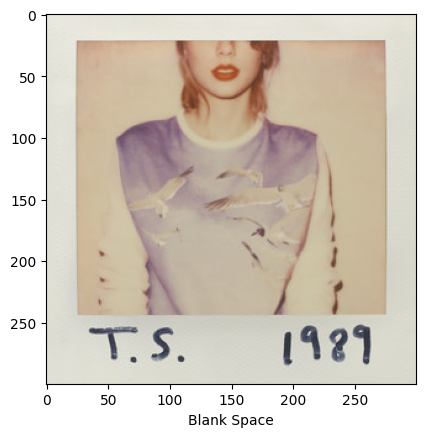

In [133]:
import matplotlib.pyplot as plt
from skimage import io

nome_musica = "Taylor Swift - Blank Space"

id = projection_kmeans \
    .where(projection_kmeans["artists_song"] == nome_musica) \
    .select("id").collect()[0][0]

track = sp.track(id)

url = track["album"]["images"][1]["url"]
name = track["name"]

image = io.imread(url)
plt.imshow(image)
plt.xlabel(name, fontsize=10)
plt.show()

In [162]:
def visualizar_musicas(nomes: str, urls: list[str]) -> None:
    plt.figure(figsize=(15, 10))
    columns = 5
    for idx, url in enumerate(urls):
        ax = plt.subplot(len(urls) // columns + 1, columns, idx + 1)
        image = io.imread(url)
        plt.imshow(image)
        ax.get_yaxis().set_visible(False)
        plt.xticks(color="w", fontsize=0.1)
        plt.yticks(color="w", fontsize=0.1)
        plt.xlabel(nomes[idx], fontsize=10)
        plt.tight_layout(h_pad=0.7, w_pad=0)
        plt.subplots_adjust(wspace=None, hspace=None)
        plt.tick_params(bottom=False)
        plt.grid(visible=None)
    plt.show()

In [137]:
playlist_id = recomendadas.select("id").collect()

nomes, urls = [], []
for item in playlist_id:
    track = sp.track(item[0])
    urls.append(track["album"]["images"][1]["url"])
    nomes.append(track["name"])

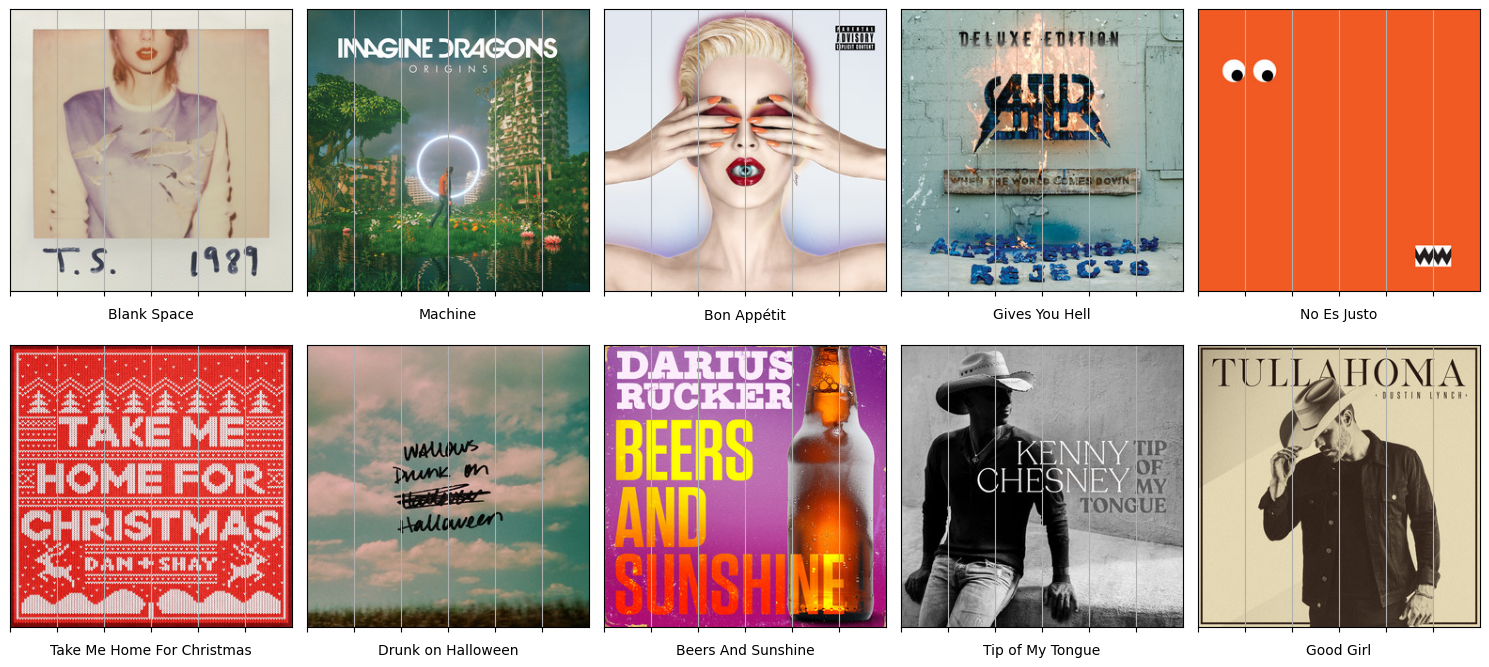

In [144]:
visualizar_musicas(nomes, urls)

In [147]:
def recomendador(nome_musica: str) -> None:
    cluster = projection_kmeans \
        .where(projection_kmeans["artists_song"] == nome_musica) \
        .select("cluster_pca").collect()[0][0]

    musicas_recomendadas = projection_kmeans \
        .where(projection_kmeans["cluster_pca"] == cluster) \
        .select("artists_song", "id", "pca_features")

    componentes_musica = musicas_recomendadas \
        .where(musicas_recomendadas["artists_song"] == nome_musica) \
        .select("pca_features").collect()[0][0]

    musicas_recomendadas_dist = musicas_recomendadas \
        .withColumn("dist", udf_calcula_distancia("pca_features"))

    recomendadas = spark.createDataFrame(
        musicas_recomendadas_dist.sort("dist").take(10)
    ).select("artists_song", "id", "dist")

    playlist_id = recomendadas.select("id").collect()

    nomes, urls = [], []
    for item in playlist_id:
        track = sp.track(item[0])
        urls.append(track["album"]["images"][1]["url"])
        nomes.append(track["name"])

    visualizar_musicas(nomes, urls)

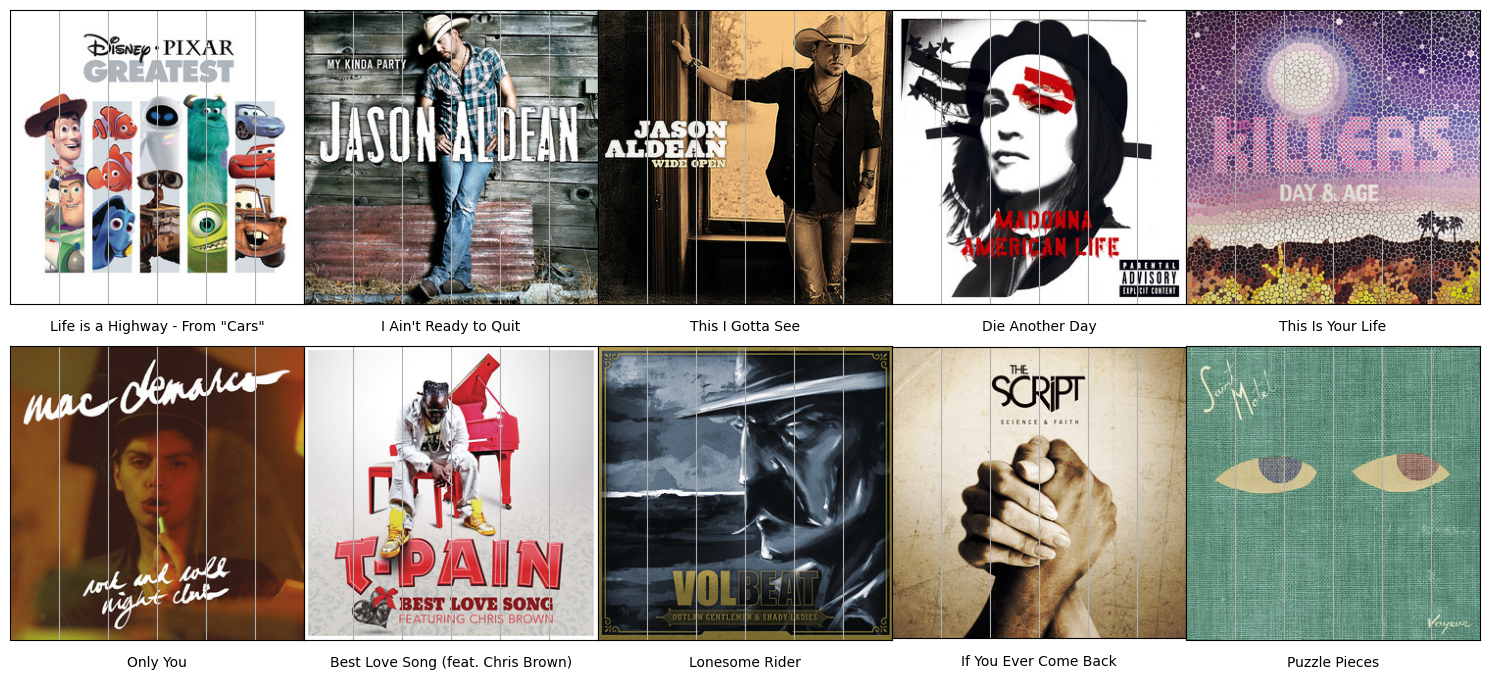

In [163]:
recomendador("Rammstein - MORGENSTERN")

In [160]:
projection_kmeans.select("artists_song").where(projection_kmeans["artists_song"].startswith("Rammstein")).show(truncate=False)

+----------------------------+
|artists_song                |
+----------------------------+
|Rammstein - Feuer frei!     |
|Rammstein - Sonne           |
|Rammstein - Ich will        |
|Rammstein - Mein Herz brennt|
|Rammstein - AMERIKA         |
|Rammstein - Links 2 3 4     |
|Rammstein - MEIN TEIL       |
|Rammstein - KEINE LUST      |
|Rammstein - Mutter          |
|Rammstein - REISE, REISE    |
|Rammstein - MOSKAU          |
|Rammstein - ROSENROT        |
|Rammstein - ICH TU DIR WEH  |
|Rammstein - Spieluhr        |
|Rammstein - OHNE DICH       |
|Rammstein - LOS             |
|Rammstein - TE QUIERO PUTA! |
|Rammstein - WAIDMANNS HEIL  |
|Rammstein - MORGENSTERN     |
|Rammstein - MANN GEGEN MANN |
+----------------------------+
only showing top 20 rows



### Para saber mais: estilização da visualização

##### `plt.subplot`

O **subplot** do Matplotlib é usado para que as imagens consigam ficar uma ao lado da outra, ou seja, para que as 10 capas de álbuns fiquem lado a lado. Os parâmetros são utilizados para criar o número de colunas exibidas. Para saber mais sobre os parâmetros que são aceitos, você pode acessar a documentação do [matplotlib.pyplot.subplot](https://matplotlib.org/3.2.2/api/_as_gen/matplotlib.pyplot.subplot.html?highlight=subplot#matplotlib.pyplot.subplot).

##### `plt.imshow`

O **imshow** possibilita a observação dos dados como imagem, no caso a lista de urls em formato de imagem total. O parâmetro em questão vem do *imread* da biblioteca Scikit Image, mas, para saber quais outros parâmetros o imshow aceita, é necessário acessar a documentação do [matplotlib.pyplot.imshow](https://matplotlib.org/3.2.2/api/_as_gen/matplotlib.pyplot.imshow.html?highlight=imshow#matplotlib.pyplot.imshow).

##### `ax.get_yaxis().set_visible(False)`

Quando usamos `get_yaxis()` estamos definindo que o eixo y é o foco da aplicação seguinte e dentro dele podem ser passados parâmetros, que não é o caso nesse momento. Para aprofundar no assunto, consulte a documentação [matplotlib.axes.Axes.get_yaxis](https://matplotlib.org/3.2.2/api/_as_gen/matplotlib.axes.Axes.get_yaxis.html?highlight=get_yaxis#matplotlib.axes.Axes.get_yaxis).

A parte seguinte consiste em aplicarmos o `set_visible()` no eixo y, que aceita True e False como parâmetro. O True é o padrão, então a possibilidade, nesse caso, é utilizar o False para que o eixo y não apareça visivelmente na resposta final. Para conhecer mais sobre o assunto, você pode acessar a documentação do [matplotlib.axis.XAxis.set_visible](https://matplotlib.org/3.2.2/api/_as_gen/matplotlib.axis.XAxis.set_visible.html).

##### `plt.xticks` e `plt.yticks`

O uso de `plt.xticks` e `plt.yticks` nos ajuda a obter e definir os locais e rótulos dos **ticks** de cada eixo, seja ele no eixo x ou y. Basicamente, os ticks podem ser personalizados e para a atual visualização, os parâmetros passados são a cor branca e o tamanho reduzido dos textos que existiam para que eles não aparecessem visualmente na imagem final. Para saber mais sobre os parâmetros que podem ser passados, leia na documentação em [matplotlib.pypplot.xticks](https://matplotlib.org/3.2.2/api/_as_gen/matplotlib.pyplot.xticks.html?highlight=xticks#matplotlib.pyplot.xticks) e [matplotlib.pyplot.yticks](https://matplotlib.org/3.2.2/api/_as_gen/matplotlib.pyplot.yticks.html?highlight=yticks#matplotlib.pyplot.yticks).

##### `plt.xlabel`

Como os outros comandos de eixo, o `plt.xlabel` faz com que consigamos fazer modificações dentro do eixo x. Nesse caso, ele recebe um texto para ser colocado, o nome de cada música, e também é possível definir qual o tamanho da fonte que será utilizada. Para mais informações sobre os parâmetros que podem ser utilizados, você pode acessar a documentação do [matplotlib.pyplot.xlabel](https://matplotlib.org/3.2.2/api/_as_gen/matplotlib.pyplot.xlabel.html?highlight=xlabel#matplotlib.pyplot.xlabel).

##### `plt.tight_layout`

Esse mídulo faz com que todos os outros se ajustem perfeitamente na figura, ou seja, qualquer módulo feito antes ou depois dele será ajustado, seja ele rótulo de eixo, marcação ou títulos de eixo. Para saber os parâmetros que podem ser passados, a documentação [matplotlib.tight_layout](https://matplotlib.org/3.2.2/api/tight_layout_api.html?highlight=tight_layout#module-matplotlib.tight_layout) pode ser consultada.

##### `plt.subplots_adjust`

Esse método ajusta os parâmetros de layout da imagem e que podem ser estudados através da documentação em [matplotlib.pyplot.subplots_adjust](https://matplotlib.org/3.2.2/api/_as_gen/matplotlib.pyplot.subplots_adjust.html?highlight=subplots_adjust#matplotlib.pyplot.subplots_adjust). No código passado em aula, o parâmetro *wspace* faz com que a largura de preenchimento das subparcelas seja ajustada, já o *hspace* é para a altura.

##### `plt.tick_params`

Esse módulo tem uma função semelhante ao que foi feito anteriormente com o `ax.get_yaxis().set_visible(False)`. Porém, como estamos utilizando um método para adicionar o título no eixo x, não podemos removê-lo totalmente como no eixo y. Logo, utilizando o método `plt.tick_params`, é possível remover apenas os marcadores. Para saber mais sobre o método e quais os parâmetros podem ser passados, a documentação [matplotlib.pyplot.tick_params](https://matplotlib.org/3.2.2/api/_as_gen/matplotlib.pyplot.tick_params.html?highlight=tick_params#matplotlib.pyplot.tick_params) pode ser acessada.

##### `plt.grid`

Esse método é usado para retirar a grade da imagem gerada automaticamente nos plots do Matplotlib. O parâmetro utilizado é o `visible=None` e para saber mais sobre ele, é necessário acessar a documentação em [matplotlib.pyplot.grid](https://matplotlib.org/3.2.2/api/_as_gen/matplotlib.pyplot.grid.html?highlight=grid#matplotlib.pyplot.grid).